### Import libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    MaxPooling2D,
    Conv2D,
    Flatten,
    BatchNormalization,
)
from tensorflow.keras import regularizers

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import numpy as np
from numpy import save
from numpy import load

### Load train and test

In [2]:
def load_saved_data():
    X_train = load("X_train_cats-dogs.npy")
    Y_train = load("Y_train_cats-dogs.npy")
    X_test = load("X_test_cats-dogs.npy")
    Y_test = load("Y_test_cats-dogs.npy")

    return X_train, Y_train, X_test, Y_test

In [3]:
X_train, Y_train, X_test, Y_test = load_saved_data()

![alt text](https://user-images.githubusercontent.com/80246631/142148427-d63b2c4b-427b-48f4-8f6f-db43a0650fe7.png "CNN")

##### source: https://www.superdatascience.com


### Train model with stratified k-fold cross validation

In [4]:
cvscores = []

In [5]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

In [6]:
for train, val in kfold.split(X_train, Y_train):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(
        X_train[train], Y_train[train], batch_size=32, epochs=30, verbose=1
    )

    scores = model.evaluate(X_train[val], Y_train[val])
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
    cvscores.append(scores[1] * 100)

Epoch 1/30
562/562 [==============================] - 7s 8ms/step - loss: 0.6916 - accuracy: 0.6626
Epoch 2/30
562/562 [==============================] - 4s 8ms/step - loss: 0.4827 - accuracy: 0.7692
Epoch 3/30
562/562 [==============================] - 4s 8ms/step - loss: 0.4234 - accuracy: 0.8055
Epoch 4/30
562/562 [==============================] - 4s 8ms/step - loss: 0.3831 - accuracy: 0.8292
Epoch 5/30
562/562 [==============================] - 4s 8ms/step - loss: 0.3404 - accuracy: 0.8507
Epoch 6/30
562/562 [==============================] - 4s 8ms/step - loss: 0.3178 - accuracy: 0.8629
Epoch 7/30
562/562 [==============================] - 5s 8ms/step - loss: 0.2898 - accuracy: 0.8746
Epoch 8/30
562/562 [==============================] - 5s 8ms/step - loss: 0.2673 - accuracy: 0.8859
Epoch 9/30
562/562 [==============================] - 5s 8ms/step - loss: 0.2340 - accuracy: 0.9022
Epoch 10/30
562/562 [==============================] - 4s 8ms/step - loss: 0.2037 - accuracy: 0.9158

Epoch 8/30
562/562 [==============================] - 4s 8ms/step - loss: 0.2761 - accuracy: 0.8847
Epoch 9/30
562/562 [==============================] - 4s 8ms/step - loss: 0.2513 - accuracy: 0.8943
Epoch 10/30
562/562 [==============================] - 4s 8ms/step - loss: 0.2206 - accuracy: 0.9086
Epoch 11/30
562/562 [==============================] - 4s 8ms/step - loss: 0.2164 - accuracy: 0.9127
Epoch 12/30
562/562 [==============================] - 4s 8ms/step - loss: 0.1782 - accuracy: 0.9288
Epoch 13/30
562/562 [==============================] - 4s 8ms/step - loss: 0.2614 - accuracy: 0.8907
Epoch 14/30
562/562 [==============================] - 4s 8ms/step - loss: 0.1773 - accuracy: 0.9286
Epoch 15/30
562/562 [==============================] - 4s 8ms/step - loss: 0.1540 - accuracy: 0.9395
Epoch 16/30
562/562 [==============================] - 4s 8ms/step - loss: 0.1644 - accuracy: 0.9353
Epoch 17/30
562/562 [==============================] - 4s 8ms/step - loss: 0.1383 - accuracy:

### Analysis and metrics on train data

In [7]:
print(cvscores)

[87.82564997673035, 83.26653242111206, 81.71342611312866, 86.47294640541077, 85.9719455242157, 83.96793603897095, 82.35589265823364, 86.21553778648376, 86.56641840934753, 84.16039943695068]


Text(0, 0.5, 'val accuracy')

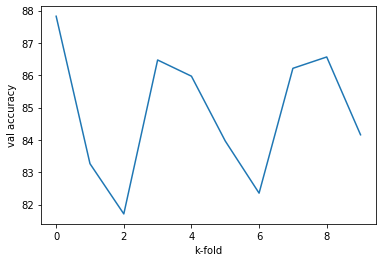

In [8]:
plt.plot(cvscores)
plt.xlabel("k-fold")
plt.ylabel("val accuracy")

In [9]:
print("mean: ", np.mean(cvscores))
print("std: ", np.std(cvscores))

mean:  84.85166847705841
std:  1.9333284734781433


### Evaluate on test set

In [10]:
test_score = model.evaluate(X_test, Y_test)

156/156 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.8363


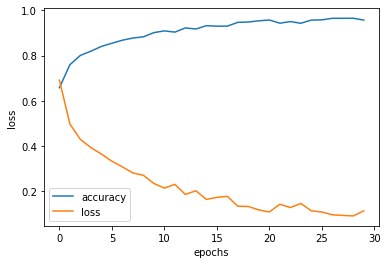

In [11]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["accuracy", "loss"])

### Reference

Article authored by me: https://medium.com/@gangulyraj3/a-quick-guide-to-convolutional-neural-networks-1c5f6a095c56